## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Preparando pacotes

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Abrindo a base

In [140]:
df_episodes = pd.read_csv('datasets/office_episodes.csv')
df_episodes.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


# Explorando a base

In [141]:
df_episodes.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


In [142]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


# Realizando a proposta

1. Create a matplotlib scatter plot of the data that contains the following attributes:

    * Each episode's episode number plotted along the x-axis
    * Each episode's viewership (in millions) plotted along the y-axis
    * A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
        * Ratings < 0.25 are colored "red"
        * Ratings >= 0.25 and < 0.50 are colored "orange"
        * Ratings >= 0.50 and < 0.75 are colored "lightgreen"
        * Ratings >= 0.75 are colored "darkgreen"

    * A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
    * A title, reading "Popularity, Quality, and Guest Appearances on the Office"
    * An x-axis label reading "Episode Number"
    * A y-axis label reading "Viewership (Millions)"
    
2. Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [143]:
# criando o color scheme pedido segundo as categorias indicadas
df_episodes.scaled_ratings.describe()

count    188.000000
mean       0.511636
std        0.184353
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        1.000000
Name: scaled_ratings, dtype: float64

In [144]:
colors = pd.cut(
    df_episodes['scaled_ratings'],
    bins=[-np.inf, 0.25, .5, .75, np.inf],
    labels=['red', 'orange', 'lightgreen', 'darkgreen'],
    right=False)

colors

0          orange
1      lightgreen
2          orange
3          orange
4      lightgreen
          ...    
183        orange
184        orange
185     darkgreen
186     darkgreen
187     darkgreen
Name: scaled_ratings, Length: 188, dtype: category
Categories (4, object): [red < orange < lightgreen < darkgreen]

In [145]:
# criando o sizing system pedido
sizes = [250 if df_episodes['has_guests'][i] == True else 25 for i in range(len(df_episodes['has_guests']))]
sizes

[25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 250,
 25,
 25,
 250,
 25,
 250,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 250]

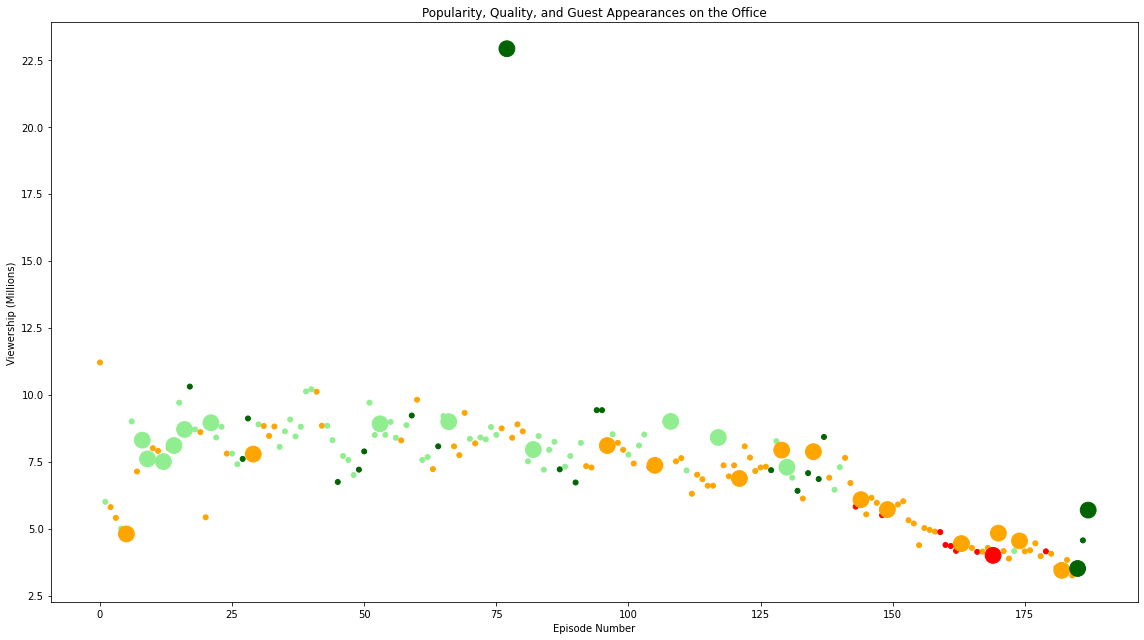

In [146]:
# plot do scatterplot pedido
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [16, 9]

ax.scatter(x='episode_number', 
           y='viewership_mil',
           s=sizes,
           c=colors,
           data=df_episodes)

ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')

plt.show()

In [147]:
# Obtendo o nome de um dos convidados do episódio mais assistido
series_top_star = df_episodes[df_episodes['viewership_mil'] == df_episodes['viewership_mil'].max()]['guest_stars']

top_star_str = series_top_star.iloc[0]
top_star_list = top_star_str.split(', ')
top_star = top_star_list[1]

top_star

'Jack Black'

# Fazendo o passo bônus

Bonus Step!
Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different marker. You can learn more about them via the Matplotlib documentation or via our course Introduction to Data Visualization with Matplotlib. Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

All other attributes still apply (data on the axes, color scheme, sizes for guest appearances, title, and axis labels)

In [148]:
# como o matplotlib não aceita markers específicos para cada obs, 
# é preciso gerar dois plots: um com os episódios com participações especiais
# e outro com os episódios sem participações especiais

colors_com_part = pd.cut(
    df_episodes['scaled_ratings'][df_episodes['has_guests'] == True],
    bins=[-np.inf, 0.25, .5, .75, np.inf],
    labels=['red', 'orange', 'lightgreen', 'darkgreen'],
    right=False)

colors_sem_part = pd.cut(
    df_episodes['scaled_ratings'][df_episodes['has_guests'] == False],
    bins=[-np.inf, 0.25, .5, .75, np.inf],
    labels=['red', 'orange', 'lightgreen', 'darkgreen'],
    right=False)

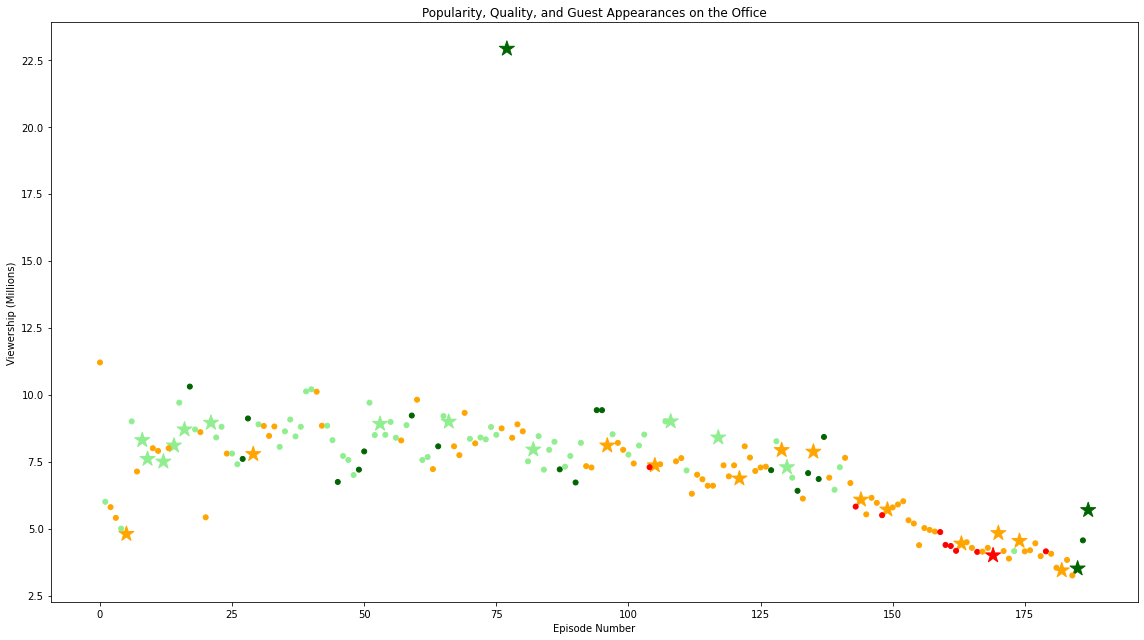

In [149]:
# plot do scatterplot pedido
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [16, 9]

ax.scatter(x=df_episodes['episode_number'][df_episodes['has_guests'] == True], 
           y=df_episodes['viewership_mil'][df_episodes['has_guests'] == True],
           marker='*',
           s=250,
           c=colors_com_part)

ax.scatter(x=df_episodes['episode_number'][df_episodes['has_guests'] == False], 
           y=df_episodes['viewership_mil'][df_episodes['has_guests'] == False],
           s=25,
           c=colors_sem_part)

ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')

plt.show()